Firewall EDA

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [76]:
firewall_04062012 = pd.read_csv('HW4/Firewall/Firewall-04062012.csv',low_memory=False)
firewall_04072012 = pd.read_csv('HW4/Firewall/Firewall-04072012.csv',low_memory=False)

In [77]:
firewall_04062012['Operation'].unique()

array(['Teardown', 'Built', '(empty)', 'Command executed', 'Deny',
       'Deny by ACL'], dtype=object)

In [78]:
firewall_04072012['Operation'].unique()

array(['Built', 'Teardown', 'Deny', '(empty)', 'Command executed'],
      dtype=object)

In [79]:
# Convert time to timestamp
firewall_04062012['Date/time'] = pd.to_datetime(firewall_04062012['Date/time'], format='%d/%b/%Y %H:%M:%S')
firewall_04062012.set_index('Date/time', inplace=True)

In [80]:
# Convert time to timestamp
firewall_04072012['Date/time'] = pd.to_datetime(firewall_04072012['Date/time'], format='%d/%b/%Y %H:%M:%S')
firewall_04072012.set_index('Date/time', inplace=True)


In [18]:
# Stack time to create activity trend histogram
stacked_activity_trend_0406 = firewall_04062012.groupby([firewall_04062012.index, 'Operation']).size().unstack(fill_value=0)
stacked_activity_trend_0406 = stacked_activity_trend_0406.resample('5Min').sum()
stacked_activity_trend_0406

Operation,(empty),Built,Command executed,Deny,Deny by ACL,Teardown
Date/time,,,,,,
2012-04-05 17:50:00,0,9,0,0,0,1
2012-04-05 17:55:00,1,3,0,0,0,11
2012-04-05 18:00:00,0,2,0,0,0,2
2012-04-05 18:05:00,1,14,0,0,0,6
2012-04-05 18:10:00,0,6,0,0,0,14
...,...,...,...,...,...,...
2012-04-06 17:00:00,0,5103,0,274,0,5100
2012-04-06 17:05:00,1,4591,0,280,0,4595
2012-04-06 17:10:00,0,4215,0,289,0,4215


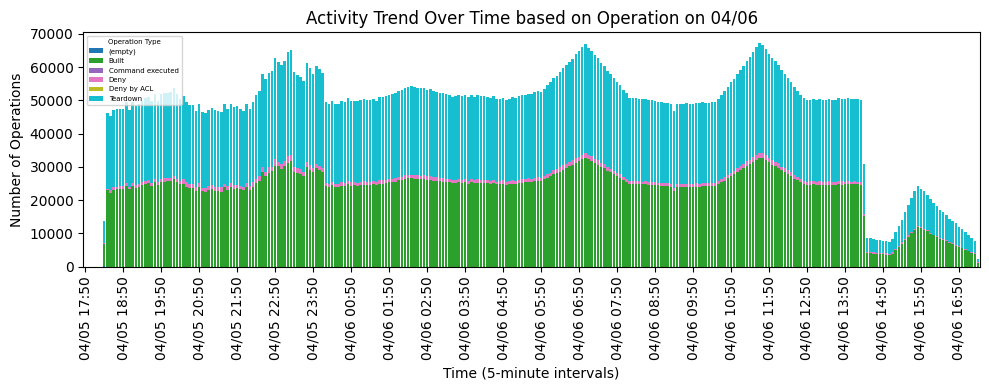

In [81]:
# Create Histogram
ax = stacked_activity_trend_0406.plot(kind='bar', stacked=True, colormap='tab10', width=0.8, figsize=(10, 4))

plt.title('Activity Trend Over Time based on Operation on 04/06')
plt.xlabel('Time (5-minute intervals)')
plt.ylabel('Number of Operations')

ax.set_xticks(range(0, len(stacked_activity_trend_0406), 12))  # Set ticks to every 60 minutes (6 * 10 min)
ax.set_xticklabels(stacked_activity_trend_0406.index[::12].strftime('%m/%d %H:%M'), rotation=90)  # Format the tick labels

plt.legend(loc='upper left',fontsize='5', title='Operation Type', title_fontsize='5')
plt.tight_layout()
plt.show()

In [19]:
# Stack time to create activity trend histogram
stacked_activity_trend_0407 = firewall_04072012.groupby([firewall_04072012.index, 'Operation']).size().unstack(fill_value=0)
stacked_activity_trend_0407 = stacked_activity_trend_0407.resample('5Min').sum()
stacked_activity_trend_0407

Operation,(empty),Built,Command executed,Deny,Teardown
Date/time,,,,,
2012-04-06 17:40:00,17,205,3,55,209
2012-04-06 17:45:00,69,216,4,61,216
2012-04-06 17:50:00,2,212,0,80,212
2012-04-06 17:55:00,3,249,0,72,248
2012-04-06 18:00:00,0,221,0,88,222
...,...,...,...,...,...
2012-04-07 08:40:00,1,25708,0,1809,25681
2012-04-07 08:45:00,0,25912,0,1867,25938
2012-04-07 08:50:00,1,25750,0,1485,25771


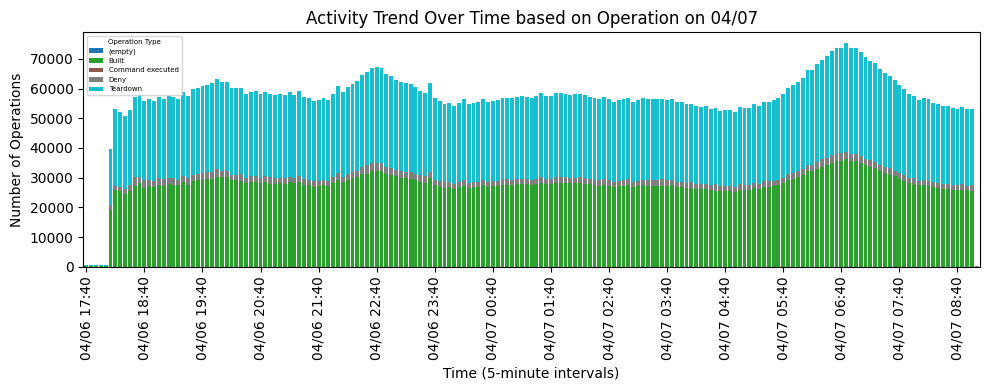

In [83]:
# Create Histogram
ax = stacked_activity_trend_0407.plot(kind='bar', stacked=True, colormap='tab10', width=0.8, figsize=(10, 4))

plt.title('Activity Trend Over Time based on Operation on 04/07')
plt.xlabel('Time (5-minute intervals)')
plt.ylabel('Number of Operations')

ax.set_xticks(range(0, len(stacked_activity_trend_0407), 12))  # Set ticks to every 60 minutes (6 * 10 min)
ax.set_xticklabels(stacked_activity_trend_0407.index[::12].strftime('%m/%d %H:%M'), rotation=90)  # Format the tick labels

plt.legend(loc='upper left',fontsize='5', title='Operation Type', title_fontsize='5')
plt.tight_layout()
plt.show()

We noticed that there is no Deny by ACL on 04/07, so we deicde to combine these 2 datasets to create consistent legend.

In [84]:
# Combine Dataset
firewall_all = pd.concat([firewall_04062012,firewall_04072012])
firewall_all

,Syslog priority,Operation,Message code,Protocol,Source IP,Destination IP,Source hostname,Destination hostname,Source port,Destination port,Destination service,Direction,Connections built,Connections torn down
Date/time,,,,,,,,,,,,,,
2012-04-05 17:51:26,Info,Teardown,ASA-6-302016,UDP,172.23.0.1,172.23.0.2,(empty),(empty),514,514,syslog,(empty),0,1
2012-04-05 17:51:26,Info,Built,ASA-6-302015,UDP,172.23.0.1,172.23.0.2,(empty),(empty),514,514,syslog,outbound,1,0
2012-04-05 17:53:06,Info,Built,ASA-6-302015,UDP,172.23.0.10,198.32.64.12,(empty),(empty),64048,53,domain,outbound,1,0
2012-04-05 17:53:10,Info,Built,ASA-6-302015,UDP,172.23.0.10,202.12.27.33,(empty),(empty),64048,53,domain,outbound,1,0
2012-04-05 17:53:14,Info,Built,ASA-6-302015,UDP,172.23.0.10,128.9.0.107,(empty),(empty),64048,53,domain,outbound,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-04-07 09:00:04,Info,Teardown,ASA-6-302014,TCP,172.23.240.125,10.32.5.58,(empty),(empty),23110,80,http,outbound,0,1
2012-04-07 09:00:04,Info,Built,ASA-6-302013,TCP,172.23.240.34,10.32.5.57,(empty),(empty),23113,80,http,outbound,1,0
2012-04-07 09:00:04,Info,Deny,ASA-6-106015,TCP,172.23.89.210,10.32.0.100,(empty),(empty),3421,80,http,(empty),0,0


In [85]:
stacked_activity_trend_all = firewall_all.groupby([firewall_all.index, 'Operation']).size().unstack(fill_value=0)
stacked_activity_trend_all = stacked_activity_trend_all.resample('5Min').sum()
stacked_activity_trend_all

Operation,(empty),Built,Command executed,Deny,Deny by ACL,Teardown
Date/time,,,,,,
2012-04-05 17:50:00,0,9,0,0,0,1
2012-04-05 17:55:00,1,3,0,0,0,11
2012-04-05 18:00:00,0,2,0,0,0,2
2012-04-05 18:05:00,1,14,0,0,0,6
2012-04-05 18:10:00,0,6,0,0,0,14
...,...,...,...,...,...,...
2012-04-07 08:40:00,1,25708,0,1809,0,25681
2012-04-07 08:45:00,0,25912,0,1867,0,25938
2012-04-07 08:50:00,1,25750,0,1485,0,25771


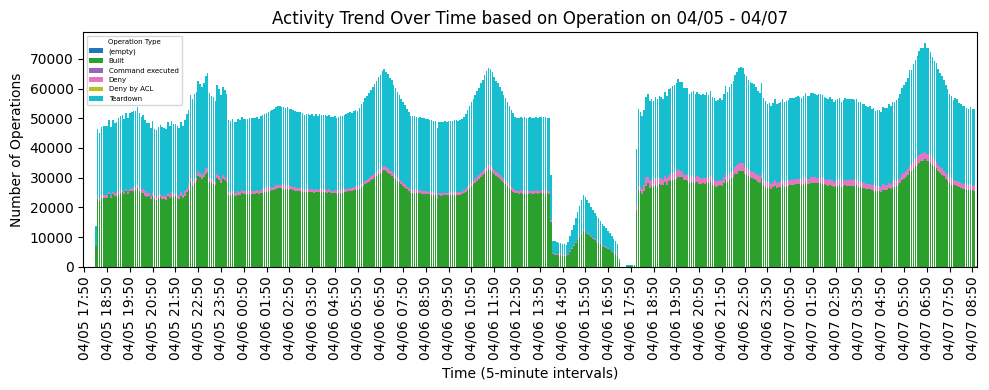

In [86]:
ax = stacked_activity_trend_all.plot(kind='bar', stacked=True, colormap='tab10', width=0.8, figsize=(10, 4))

plt.title('Activity Trend Over Time based on Operation on 04/05 - 04/07')
plt.xlabel('Time (5-minute intervals)')
plt.ylabel('Number of Operations')

ax.set_xticks(range(0, len(stacked_activity_trend_all), 12))  # Set ticks to every 60 minutes (6 * 10 min)
ax.set_xticklabels(stacked_activity_trend_all.index[::12].strftime('%m/%d %H:%M'), rotation=90)  # Format the tick labels

plt.legend(loc='upper left',fontsize='5', title='Operation Type', title_fontsize='5')
plt.tight_layout()
plt.show()

In [87]:
# Function to filter activity of a source ip and visualize its activity
def filter_ip_and_visualize_activity(source_ip):
    filtered_df = firewall_all[firewall_all['Source IP'] == source_ip]
    filtered_activity_trend = filtered_df.groupby([filtered_df.index, 'Operation']).size().unstack(fill_value=0)
    filtered_activity_trend = filtered_activity_trend.resample('5Min').sum()
    
    ax = filtered_activity_trend.plot(kind='bar', stacked=True, colormap='tab10', width=0.8, figsize=(10, 4))

    # Adding labels and title
    plt.title(source_ip + "'s Activity Trend Over Time based on Operation on 04/05 - 04/07")
    plt.xlabel('Time (10-minute intervals)')
    plt.ylabel('Number of Operations')
    plt.ylim(0, 400)

    ax.set_xticks(range(0, len(filtered_activity_trend), 12))  # Set ticks to every 60 minutes (6 * 10 min)
    ax.set_xticklabels(filtered_activity_trend.index[::12].strftime('%m/%d %H:%M'), rotation=90)  # Format the tick labels

    plt.legend(loc='upper left',fontsize='5', title='Operation Type', title_fontsize='5')
    plt.tight_layout()
    plt.show()

In [88]:
suspicious_source_ips = [
    "172.23.231.69",
    "172.23.232.4",
    "172.23.234.58",
    "172.23.236.8",
    "172.23.240.156"
]

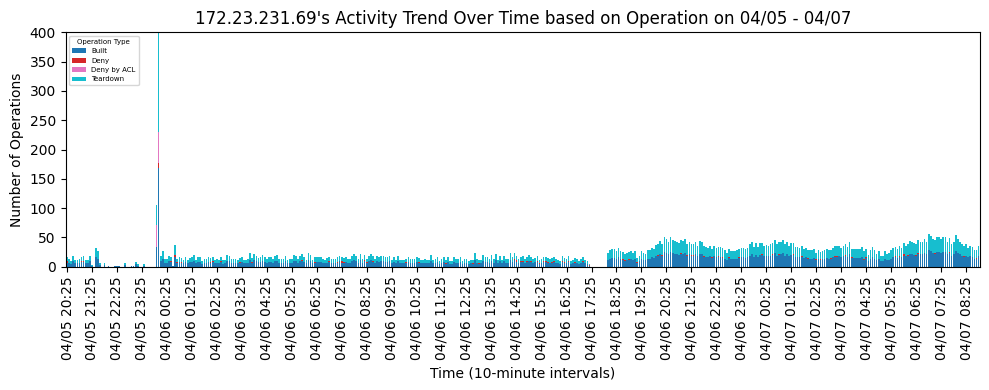

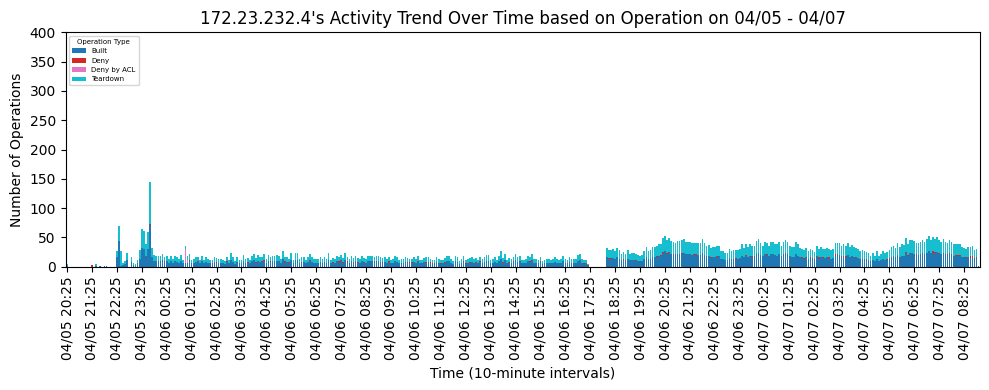

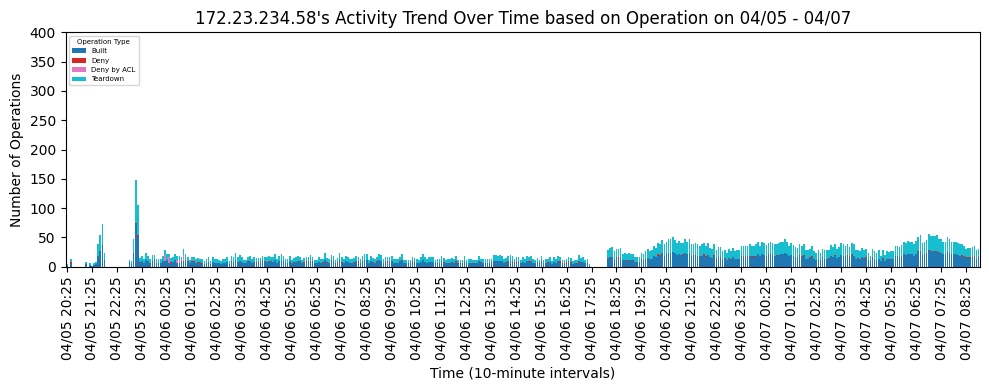

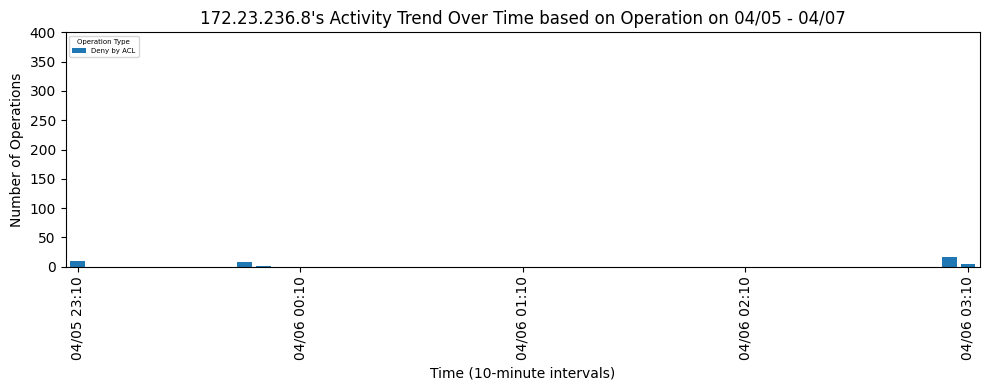

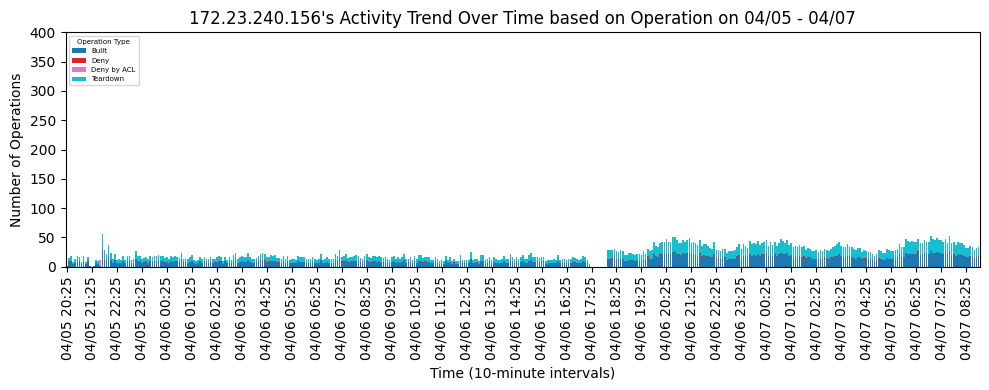

In [89]:
for suspicious_source_ip in suspicious_source_ips:
    filter_ip_and_visualize_activity(suspicious_source_ip)

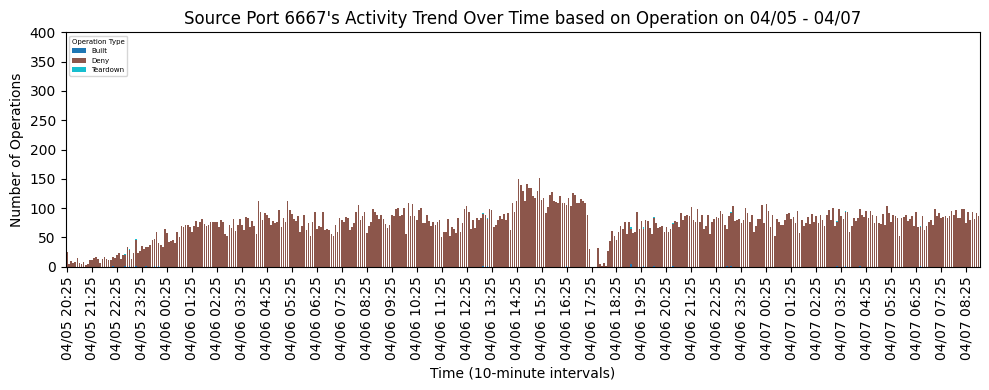

In [95]:
# Inspect individual port's activity
filtered_df = firewall_all[firewall_all['Source port'] == '6667']
filtered_activity_trend = filtered_df.groupby([filtered_df.index, 'Operation']).size().unstack(fill_value=0)
filtered_activity_trend = filtered_activity_trend.resample('5Min').sum()

ax = filtered_activity_trend.plot(kind='bar', stacked=True, colormap='tab10', width=0.8, figsize=(10, 4))

# Adding labels and title
plt.title("Source Port 6667's Activity Trend Over Time based on Operation on 04/05 - 04/07")
plt.xlabel('Time (10-minute intervals)')
plt.ylabel('Number of Operations')
plt.ylim(0, 400)

ax.set_xticks(range(0, len(filtered_activity_trend), 12))  # Set ticks to every 60 minutes (6 * 10 min)
ax.set_xticklabels(filtered_activity_trend.index[::12].strftime('%m/%d %H:%M'), rotation=90)  # Format the tick labels

plt.legend(loc='upper left',fontsize='5', title='Operation Type', title_fontsize='5')
plt.tight_layout()
plt.show()

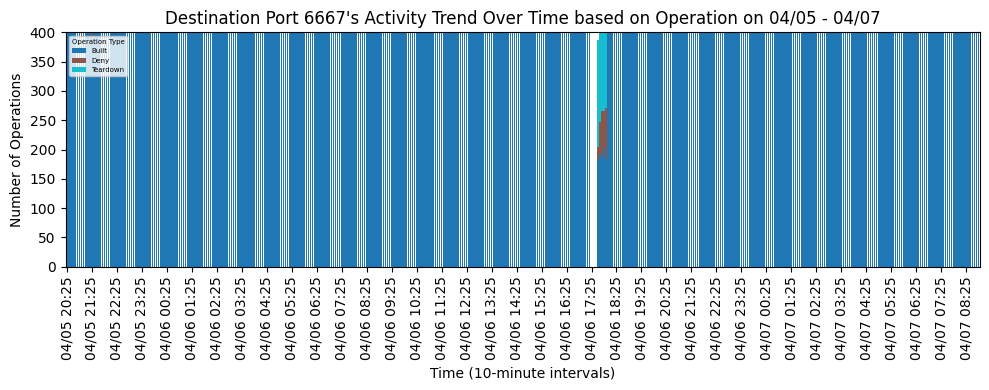

In [98]:
# Inspect individual port's activity
filtered_df = firewall_all[firewall_all['Destination port'] == '6667']
filtered_activity_trend = filtered_df.groupby([filtered_df.index, 'Operation']).size().unstack(fill_value=0)
filtered_activity_trend = filtered_activity_trend.resample('5Min').sum()

ax = filtered_activity_trend.plot(kind='bar', stacked=True, colormap='tab10', width=0.8, figsize=(10, 4))

# Adding labels and title
plt.title("Destination Port 6667's Activity Trend Over Time based on Operation on 04/05 - 04/07")
plt.xlabel('Time (10-minute intervals)')
plt.ylabel('Number of Operations')
plt.ylim(0, 400)

ax.set_xticks(range(0, len(filtered_activity_trend), 12))  # Set ticks to every 60 minutes (6 * 10 min)
ax.set_xticklabels(filtered_activity_trend.index[::12].strftime('%m/%d %H:%M'), rotation=90)  # Format the tick labels

plt.legend(loc='upper left',fontsize='5', title='Operation Type', title_fontsize='5')
plt.tight_layout()
plt.show()